<a href="https://colab.research.google.com/github/IrfanKarim101/Artificial-Intelligence/blob/main/nyc_taxi_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Mounted Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/yellow_tripdata_2013-01.parquet')



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Bidirectional

In [ ]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2013-01-01 00:39:00,2013-01-01 00:55:00,3,3.86,1,None,238,116,2,15.0,0.5,0.5,0.00,0.0,0.0,16.00,None,None
1,2,2013-01-01 00:12:00,2013-01-01 00:16:00,5,0.00,1,None,264,264,1,3.5,0.5,0.5,0.12,0.0,0.0,4.62,None,None
2,2,2013-01-01 00:02:00,2013-01-01 00:03:00,3,0.00,1,None,264,264,1,2.5,0.5,0.5,0.25,0.0,0.0,3.75,None,None
3,2,2013-01-01 00:38:00,2013-01-01 00:38:00,2,0.00,1,None,264,264,2,2.5,0.5,0.5,0.00,0.0,0.0,3.50,None,None
4,2,2013-01-01 00:03:00,2013-01-01 00:04:00,4,0.00,1,None,264,264,1,3.0,0.5,0.5,0.07,0.0,0.0,4.07,None,None


In [ ]:
# Drop rows with NaN values in critical columns
data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'fare_amount'], inplace=True)


In [ ]:
# Convert datetime columns
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')


In [ ]:
# Drop rows where datetime conversion failed
data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [ ]:
# Filter rows with valid trip distances and fare amounts
data = data[(data['trip_distance'] > 0) & (data['fare_amount'] > 0)]

In [ ]:
# Calculate trip duration in minutes
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [ ]:
# Create derived columns for hour and day of the week
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data['day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek

In [ ]:
# Standardize trip_distance and trip_duration
scaler = StandardScaler()
data[['trip_distance', 'trip_duration']] = scaler.fit_transform(data[['trip_distance', 'trip_duration']])

In [ ]:
# Prepare features and target variable
X = data[['trip_distance', 'hour', 'day_of_week']]
y = data['fare_amount']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# fit train data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Select a smaller subset of the test set
X_test_subset = X_test.sample(n=1000, random_state=42)

# Ensure y_test_subset is aligned with the subset from X_test
y_test_subset = y_test.loc[X_test_subset.index]

In [ ]:
# Make predictions for the smaller subset
y_pred = knn.predict(X_test_subset)

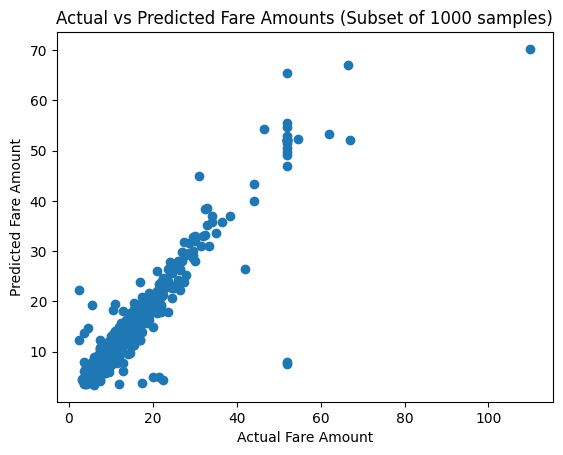

In [ ]:
# Visualize the results
plt.scatter(y_test_subset, y_pred)
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs Predicted Fare Amounts (Subset of 1000 samples)")
plt.show()